# Assignment 1: Comparison of Regression Models on Housing Prices in Boston, MA

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (Image Credit: Boston.gov). You will attempt to predict the housing prices in Ames, Iowa. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The task of this Codeathon is regression which we ose the Mean Absolute Error to find its performance. We are expecting to use this project to estimate the housing price in Boston, Ma and then find the the percentage error in our estimate. The data being collected are including the sale price, number of rooms, lot area, neighbor info and etc.

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
      0.45 MB.
 * How many entries does it have?
      1460 entries.
 * How many features does it have?
      Inluding the ID number in the first column, there are 81 features.
 * Does it contain any categorical data?
      Yes, and there are a lot of different categories.
 * Is there any missing values?
      There are many N/A input, I think it is the missing values.
 * What are some basic statistics you can learn right away about this dataset?
      There are lots of variables which means can create different type of graphs.


In [74]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Codeathon_1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [75]:
import pandas as pd

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv('./sample_data/train.csv')
  return housing

housing = loadBostonHousingData()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [76]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

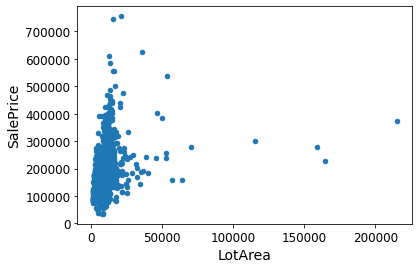

In [78]:
housing.plot(kind="scatter", x="LotArea", y="SalePrice")
# save_fig("bad_visualization_plot")

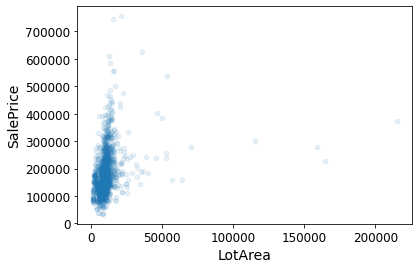

In [79]:
#newLotArea = LotArea<1000
housing.plot(kind="scatter", x="LotArea", y="SalePrice", alpha=0.1, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f826de00d10>,
      dtype=object)

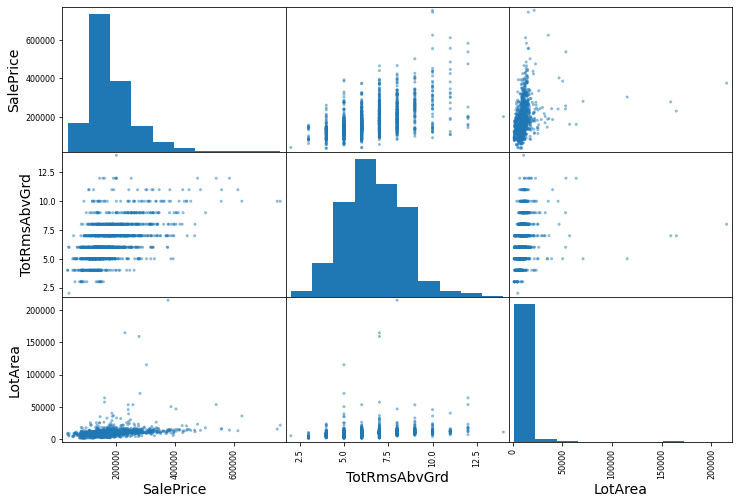

In [80]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "TotRmsAbvGrd", "LotArea"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [81]:
# Your code to visualize the data here
# Let's look at how much each feature correlates to the house value 
import matplotlib.image as mpimg
corr_matrix = housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [82]:
corr_matrix = housing.corr()
corr_matrix.shape

(38, 38)

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and set, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [83]:
print(housing.shape)

(1460, 81)


In [84]:
train_set = pd.read_csv('./sample_data/train.csv')

In [85]:
# Create the features and labels for training
#housing = train_set.drop("SalePrice", axis=1) # drop labels for training set
#housing_labels = train_set["SalePrice"].copy()

In [86]:
print(housing.shape)

(1460, 81)


In [87]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set, validation_set = train_test_split(train_set, test_size=0.2, random_state=42)

In [88]:
# Create the features and labels for training
housing = train_set.drop("SalePrice", axis=1) # drop labels for training set
housing_labels = train_set["SalePrice"].copy()


In [89]:
print( train_set.shape )
print( test_set.shape )
print( validation_set.shape)

(934, 81)
(292, 81)
(234, 81)


In [90]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
251,252,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,...,153,0,NaN,NaN,NaN,0,12,2007,WD,Family
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,Con,Normal


In [91]:
# Third option is to fill the missing values with something reasonable (zero, mean, median, ect)
# .fillna() will get this done
median = housing["BedroomAbvGr"].median()
sample_incomplete_rows["BedroomAbvGr"].fillna(median, inplace=True) # option 3

In [92]:
print(housing.shape)

(934, 80)


In [93]:
sample_incomplete_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
251,252,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,...,153,0,NaN,NaN,NaN,0,12,2007,WD,Family
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,Con,Normal


In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [95]:
print(housing.shape)

(934, 80)


In [96]:
housing_num = pd.read_csv('./sample_data/train.csv')
housing_num = housing_num.drop("SalePrice", axis=1)
numeric_cols = housing_num.select_dtypes(exclude='number')
housing_num.drop(numeric_cols, axis=1, inplace=True)
housing_num
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [97]:
print(housing.shape)
print(housing_num.shape)

(934, 80)
(1460, 37)


In [98]:
imputer.statistics_

array([7.3050e+02, 5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02,
       0.0000e+00, 4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00,
       0.0000e+00, 1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [99]:
housing_num.median().values

array([7.3050e+02, 5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02,
       0.0000e+00, 4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00,
       0.0000e+00, 1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [100]:
X = imputer.transform(housing_num)
print(X)

[[1.000e+00 6.000e+01 6.500e+01 ... 0.000e+00 2.000e+00 2.008e+03]
 [2.000e+00 2.000e+01 8.000e+01 ... 0.000e+00 5.000e+00 2.007e+03]
 [3.000e+00 6.000e+01 6.800e+01 ... 0.000e+00 9.000e+00 2.008e+03]
 ...
 [1.458e+03 7.000e+01 6.600e+01 ... 2.500e+03 5.000e+00 2.010e+03]
 [1.459e+03 2.000e+01 6.800e+01 ... 0.000e+00 4.000e+00 2.010e+03]
 [1.460e+03 2.000e+01 7.500e+01 ... 0.000e+00 6.000e+00 2.008e+03]]


In [101]:
imputer.strategy

'median'

In [102]:
print(housing.shape)

(934, 80)


In [103]:
housing_cat = housing[["Neighborhood"]]
housing_cat.head(10)

,Neighborhood
251,Crawfor
861,Sawyer
851,Blmngtn
582,Edwards
326,Veenker
1366,CollgCr
1261,NAmes
117,Edwards
1067,NAmes
839,Edwards


In [104]:
from sklearn.preprocessing import OrdinalEncoder
# OrdinalEncoder encodes consecutive numbers for the categories (5 categories --> 0,1,2,3,4)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[ 5.],
       [18.],
       [ 0.],
       [ 6.],
       [23.],
       [ 4.],
       [11.],
       [ 6.],
       [11.],
       [ 6.]])

In [105]:
ordinal_encoder.categories_

[array(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
        'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
        'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
        'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
       dtype=object)]

In [106]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<934x24 sparse matrix of type '<class 'numpy.float64'>'
	with 934 stored elements in Compressed Sparse Row format>

In [107]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [108]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [109]:
cat_encoder.categories_

[array(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
        'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
        'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
        'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
       dtype=object)]

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [111]:
housing_num_tr

array([[-1.73086488,  0.07337496, -0.22087509, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-1.7284922 , -0.87256276,  0.46031974, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [-1.72611953,  0.07337496, -0.08463612, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 1.72611953,  0.30985939, -0.1754621 , ...,  4.95311151,
        -0.48911005,  1.64520971],
       [ 1.7284922 , -0.87256276, -0.08463612, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [ 1.73086488, -0.87256276,  0.23325479, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [166]:
from sklearn.compose import ColumnTransformer
#new_housing = pd.read_csv('./sample_data/train.csv')
#new_housing 
num_attribs = list(housing_num)
cat_attribs = ["Neighborhood"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)


In [113]:
# housing_prepared
print(housing.shape)
print(housing_prepared.shape)

(934, 80)
(934, 61)


In [ ]:
housing_prepared

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [148]:
print(housing_prepared.shape)
print(housing_labels.shape)

(934, 61)
(934,)


In [149]:
# Try a few models here
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [150]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[5:]
some_labels = housing_labels.iloc[5:]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [214779. 111523. 142355. 184939. 100491. 120251. 220171. 193179. 248555.
 246377. 170635. 119355.  68699. 239371. 120987. 153827. 122715. 318883.
 267131. 224985. 116839.  91947. 169379. 238571. 198283. 249611. 172571.
 214431. 117823. 143339. 165047. 128947. 237931. 280115. 190811.  95419.
 166973. 217115. 108483. 178603. 127891. 140123. 157563. 226539. 232187.
 329067. 201451. 153279. 191499.  85595. 146603. 162411. 189419. 276363.
 135199. 168267. 175339. 134835. 100555. 205051. 203499.  56275. 272075.
 144027. 272027. 139083. 310763.  74891. 167579. 179691. 217579. 222299.
 153555. 213769.  68751. 198603. 146675. 211691. 174291. 250683.  97115.
 304827.  91371. 220843. 124931. 153131. 123403. 172779.  93483. 209203.
 287419. 175563. 110203. 205643. 149227.  84747. 121995. 201211. 149571.
 122960. 112715.  11723. 224507. 229609. 105691.  38123. 179099. 235403.
 120891. 271691. 122363. 166411. 386571. 136939. 145083. 101691. 319795.
 110931. 266603. 140207. 122555. 16326

In [151]:
print("Labels:", list(some_labels))

Labels: [193000, 128900, 155000, 167900, 130500, 127000, 195000, 162000, 262280, 189000, 161000, 129900, 93000, 248900, 123000, 165000, 133000, 260000, 392500, 185000, 122500, 89000, 175000, 237000, 235000, 275000, 172785, 151400, 129000, 169500, 149900, 128000, 236500, 269790, 174000, 118000, 146000, 175900, 90000, 157000, 128500, 133000, 150750, 256000, 216000, 350000, 217000, 140000, 157000, 107400, 149300, 110000, 183200, 285000, 138800, 188700, 149000, 128000, 100000, 180000, 224900, 82000, 270000, 146500, 307000, 143000, 318000, 85000, 174000, 170000, 208900, 239799, 157500, 226000, 87500, 174000, 132000, 223500, 140000, 239000, 73000, 392000, 76000, 221500, 129000, 162000, 148000, 164700, 93000, 182000, 260000, 177500, 100000, 191000, 145250, 82500, 132250, 179600, 130000, 124000, 110000, 61000, 208500, 228500, 113000, 80000, 136000, 223000, 129900, 278000, 128000, 143000, 582933, 132000, 140000, 100000, 336000, 123600, 275000, 132000, 152000, 130000, 319900, 249700, 134800, 213

In [152]:
some_data_prepared

array([[ 1.49166566e+00,  6.64579459e-02, -8.85299167e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24290337e+00, -8.75807275e-01,  4.39259076e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.46742104e+00, -8.75807275e-01,  1.75364580e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.22677302e-01, -8.75807275e-01, -5.65084575e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.05598066e-01,  6.64579459e-02,  4.39259076e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.25711836e+00, -8.75807275e-01,  8.35100821e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [153]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

31051.08127288329

In [154]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

19589.99250535332

In [155]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [156]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [157]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [158]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [38853.44525182 30143.93853769 35065.6393988  67674.79395012
 36260.60339797 40337.93878923 37949.1600026  36283.14987393
 28398.6836485  41393.7996879 ]
Mean: 39236.115253856915
Standard deviation: 10254.340050898254


In [159]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [29574.78561594 33531.64335085 37302.44555684 66310.38283768
 26000.28315313 27568.42255833 37274.80131648 38093.94106778
 25224.66959362 33441.54268791]
Mean: 35432.29177385598
Standard deviation: 11244.189176068263


In [160]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [161]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12192.132433513903

In [162]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [30163.73444314 27350.02124492 45067.16998667 53957.75793474
 23969.72376129 22505.0693088  31165.4509615  26012.12098699
 21663.57473035 30290.27920432]
Mean: 31214.4902562712
Standard deviation: 9862.418709684887


In [163]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     35432.291774
std      11852.416079
min      25224.669594
25%      28070.013323
50%      33486.593019
75%      37295.534497
max      66310.382838
dtype: float64

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [132]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [133]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [134]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

43023.421083301415 {'max_features': 2, 'n_estimators': 3}
36034.87679421114 {'max_features': 2, 'n_estimators': 10}
34497.89976627726 {'max_features': 2, 'n_estimators': 30}
42808.2934607457 {'max_features': 4, 'n_estimators': 3}
35303.23483734055 {'max_features': 4, 'n_estimators': 10}
33152.704848464666 {'max_features': 4, 'n_estimators': 30}
38958.586078332424 {'max_features': 6, 'n_estimators': 3}
33293.935346817285 {'max_features': 6, 'n_estimators': 10}
32106.200778545273 {'max_features': 6, 'n_estimators': 30}
36061.12580803805 {'max_features': 8, 'n_estimators': 3}
31879.516142705623 {'max_features': 8, 'n_estimators': 10}
31499.68404459502 {'max_features': 8, 'n_estimators': 30}
40198.08390911818 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
35116.78136855052 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
39667.644749189414 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
33662.72061021162 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [135]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008000,0.002174,0.001199,0.000076,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.826339e+09,-2.353166e+09,...,-1.851015e+09,2.677128e+08,18,-4.222651e+08,-4.041521e+08,-5.570939e+08,-6.523705e+08,-7.481888e+08,-5.568141e+08,1.320337e+08
1,0.019806,0.000824,0.002190,0.000075,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.338587e+09,-2.035688e+09,...,-1.298512e+09,4.146115e+08,11,-2.229224e+08,-2.048606e+08,-2.563946e+08,-2.654539e+08,-2.540068e+08,-2.407276e+08,2.296367e+07
2,0.056944,0.002905,0.005317,0.000655,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.156920e+09,-1.942612e+09,...,-1.190105e+09,4.287985e+08,8,-1.511885e+08,-1.468572e+08,-1.743303e+08,-1.994425e+08,-1.856788e+08,-1.714995e+08,2.004824e+07
3,0.007971,0.000646,0.001254,0.000256,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.988065e+09,-2.766000e+09,...,-1.832550e+09,5.347558e+08,17,-4.555039e+08,-4.655691e+08,-4.914072e+08,-4.709950e+08,-4.909101e+08,-4.748770e+08,1.419387e+07
4,0.021716,0.000844,0.002113,0.000060,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.171331e+09,-2.118011e+09,...,-1.246318e+09,4.583707e+08,10,-2.112499e+08,-2.270945e+08,-2.394858e+08,-2.206893e+08,-2.284513e+08,-2.253941e+08,9.306017e+06
5,0.062435,0.001304,0.004506,0.000082,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9.791649e+08,-2.006966e+09,...,-1.099102e+09,4.933117e+08,4,-1.563305e+08,-1.273162e+08,-1.591945e+08,-1.562657e+08,-1.766384e+08,-1.551491e+08,1.584592e+07
6,0.008262,0.000318,0.001163,0.000051,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.113605e+09,-2.706666e+09,...,-1.517771e+09,6.316287e+08,13,-3.405377e+08,-4.742824e+08,-4.177540e+08,-4.859212e+08,-5.627960e+08,-4.562583e+08,7.406602e+07
7,0.024697,0.001744,0.002173,0.000056,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.080484e+09,-2.066863e+09,...,-1.108486e+09,5.044017e+08,5,-1.941584e+08,-2.148862e+08,-2.205972e+08,-2.453882e+08,-1.972773e+08,-2.144615e+08,1.844885e+07
8,0.072753,0.003427,0.004655,0.000148,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.056953e+09,-1.935627e+09,...,-1.030808e+09,4.861086e+08,3,-1.445675e+08,-1.254636e+08,-1.689167e+08,-1.627711e+08,-1.547282e+08,-1.512894e+08,1.527439e+07
9,0.008832,0.000161,0.001191,0.000039,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.040906e+09,-2.464343e+09,...,-1.300405e+09,6.035626e+08,12,-5.582021e+08,-3.625136e+08,-4.323527e+08,-6.232335e+08,-4.910469e+08,-4.934698e+08,9.156374e+07


In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f826da53b50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f826da53b90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [137]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

31411.845699689587 {'max_features': 7, 'n_estimators': 180}
33929.70920848527 {'max_features': 5, 'n_estimators': 15}
33060.30860122299 {'max_features': 3, 'n_estimators': 72}
33148.915430792076 {'max_features': 5, 'n_estimators': 21}
31650.874190434064 {'max_features': 7, 'n_estimators': 122}
33102.88054604449 {'max_features': 3, 'n_estimators': 75}
32961.880565307765 {'max_features': 3, 'n_estimators': 88}
32211.029139367598 {'max_features': 5, 'n_estimators': 100}
32843.74730904978 {'max_features': 3, 'n_estimators': 150}
46520.959251686996 {'max_features': 5, 'n_estimators': 2}


In [138]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.39730164e-03, 8.45068441e-03, 2.05774715e-02, 1.81063991e-02,
       1.61957068e-01, 6.25246734e-03, 5.32861794e-02, 2.72806318e-02,
       1.74659543e-02, 4.75751753e-02, 1.54473785e-03, 1.05766825e-02,
       8.45195427e-02, 6.80454927e-02, 4.00853953e-02, 4.96911870e-04,
       1.25182067e-01, 5.37738517e-03, 6.04046412e-04, 2.93682991e-02,
       4.29628467e-03, 5.98494578e-03, 3.23127881e-03, 2.04037168e-02,
       1.55632149e-02, 3.70178169e-02, 7.17972928e-02, 3.21990622e-02,
       7.10042049e-03, 1.61454213e-02, 2.97130685e-03, 7.67682671e-04,
       9.07373627e-03, 9.81761441e-03, 3.95709333e-04, 4.21159930e-03,
       2.65121322e-03, 4.90392900e-04, 3.00182313e-05, 9.26415034e-05,
       7.65610234e-04, 4.24174626e-04, 1.61608026e-03, 1.63074803e-03,
       8.83713824e-04, 1.76327440e-04, 5.81823213e-05, 1.61285800e-04,
       1.93669003e-03, 1.03117986e-04, 5.51665663e-04, 7.08911355e-03,
       1.71495538e-03, 1.66201505e-03, 1.17333088e-04, 2.32442422e-04,
      

In [139]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.16195706799622825, 'OverallQual'),
 (0.12518206700530712, 'GrLivArea'),
 (0.08451954268577132, 'TotalBsmtSF'),
 (0.07179729279601926, 'GarageCars'),
 (0.06804549266202736, '1stFlrSF'),
 (0.053286179436633066, 'YearBuilt'),
 (0.047575175330166815, 'BsmtFinSF1'),
 (0.040085395349288504, '2ndFlrSF'),
 (0.037017816899374244, 'GarageYrBlt'),
 (0.0321990621543618, 'GarageArea'),
 (0.029368299069600687, 'FullBath'),
 (0.02728063176847269, 'YearRemodAdd'),
 (0.020577471546899474, 'LotFrontage'),
 (0.020403716844949647, 'TotRmsAbvGrd'),
 (0.018106399131403095, 'LotArea'),
 (0.017465954329376133, 'MasVnrArea'),
 (0.01614542132298896, 'OpenPorchSF'),
 (0.01556321494656634, 'Fireplaces'),
 (0.010576682508686345, 'BsmtUnfSF'),
 (0.009817614407444896, 'PoolArea'),
 (0.009073736268084841, 'ScreenPorch'),
 (0.008450684410965768, 'MSSubClass'),
 (0.007100420493453096, 'WoodDeckSF'),
 (0.007089113545576465, 'NoRidge'),
 (0.006397301637983969, 'Id'),
 (0.006252467339500237, 'OverallCond'),
 (0.005984

In [147]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
#X_test = test_set
y_test = test_set["SalePrice"].copy()
print(X_test.shape)


(292, 80)


In [168]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
#X_test = test_set
y_test = test_set["SalePrice"].copy()
#print(X_test.shape)
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [169]:
final_rmse

30461.382700587375

In [170]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

17990.022831050228

In [171]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([21685.05149666, 37222.97964498])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

I pitch my solution by importing the data, then getting all the necessary information including the room number, the sale price, the neighborhood and, etc. In that case, I am able to get plotted charts, and tables, and calculate the mean square error.
I learned that I can predict the sale price through the regression line. There is definitely more I can do to improve the solution, for example, finding a line that can fit the graph more and find out the solution with fewer errors, etc.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!